# Specifying your own neural network with MNEflow

In [1]:
import numpy as np

import mne
mne.set_log_level(verbose='CRITICAL')
from mne.datasets import multimodal

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

import mneflow
print(mneflow.__version__)

0.5.4


In [2]:
import_opt = dict(path='C:\\data\\',
                  data_id='mne_sample_multimodal',
                  overwrite=False,
                  )

#here we use None instead of the first required argument
meta = mneflow.produce_tfrecords(None, **import_opt)

Metadata file found, restoring


In [9]:
#let's make a simple peceptron-like classifier using all channels*timepoints as features with keras
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.constraints import max_norm

class MyNetwork(mneflow.models.BaseModel):
    #In the simplest case all you need to do is to override the computational graph with your own
    def build_graph(self):
        self.scope = 'custom_model'
        flat = Flatten()(self.inputs)
        self.fc = Dense(units=7, activation="softmax")
        y_pred = self.fc(flat)
        return y_pred
    
    #the same can be done with Optimizer._set_optimizer method if you need to use a custom optimization pipeline  

In [10]:
graph_specs = dict()
dataset = mneflow.Dataset(meta, train_batch=25, class_subset=[0, 1, 2, 3, 4, 5, 6])
model = MyNetwork(meta, dataset)
model.build()
model.train(n_epochs=10, eval_step=50, early_stopping=3)

Using class_subset with 7 classes:
Subset ratio 1.00, Multiplier 1.00
Using class_subset with 7 classes:
Subset ratio 1.00, Multiplier 1.00
Updating: meta.data
Input shape: (1, 301, 204)
y_pred: (None, 7)
Initialization complete!
Updating: meta.train_params
Class weights:  None
Using class_subset with 7 classes:
Subset ratio 1.00, Multiplier 1.00
Epoch 1/10


c:\users\ipzub\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


100/100 - 8s - loss: 0.1240 - cat_ACC: 0.9663 - val_loss: 1.4547 - val_cat_ACC: 0.7130 - 8s/epoch - 79ms/step
Epoch 2/10
100/100 - 8s - loss: 6.5062e-05 - cat_ACC: 1.0000 - val_loss: 1.4442 - val_cat_ACC: 0.7130 - 8s/epoch - 82ms/step
Epoch 3/10
100/100 - 8s - loss: 4.0714e-05 - cat_ACC: 1.0000 - val_loss: 1.4380 - val_cat_ACC: 0.7130 - 8s/epoch - 82ms/step
Epoch 4/10
100/100 - 8s - loss: 2.9510e-05 - cat_ACC: 1.0000 - val_loss: 1.4336 - val_cat_ACC: 0.7043 - 8s/epoch - 79ms/step
Epoch 5/10
100/100 - 8s - loss: 2.2976e-05 - cat_ACC: 1.0000 - val_loss: 1.4301 - val_cat_ACC: 0.7043 - 8s/epoch - 81ms/step
Epoch 6/10
100/100 - 8s - loss: 1.8680e-05 - cat_ACC: 1.0000 - val_loss: 1.4271 - val_cat_ACC: 0.7043 - 8s/epoch - 79ms/step
Epoch 7/10
100/100 - 8s - loss: 1.5631e-05 - cat_ACC: 1.0000 - val_loss: 1.4244 - val_cat_ACC: 0.7043 - 8s/epoch - 81ms/step
Epoch 8/10
100/100 - 8s - loss: 1.3351e-05 - cat_ACC: 1.0000 - val_loss: 1.4220 - val_cat_ACC: 0.7043 - 8s/epoch - 80ms/step
Epoch 9/10
100/

### Since our custom model inherits methods from the parent class we can e.g. plot the the confusion matrix

Confusion matrix, without normalization


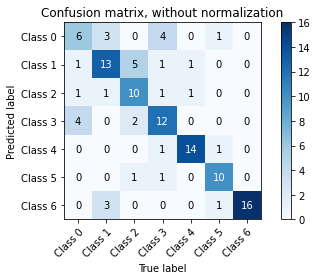

In [16]:
f = model.plot_confusion_matrix()